In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#Checking for GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB
Sun May 19 16:19:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              27W / 250W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from sklearn.model_selection import train_test_split
!pip install joblib
import joblib

In [4]:
# train_data_path = '/kaggle/working/train_data_arabic_tweets.csv'

# if os.path.isfile(train_data_path):
#     # Check if the training data file already exists
#     train_df = pd.read_csv(train_data_path)
# else:
#     # Read the negative data training set
#     train_neg = pd.read_csv("/kaggle/input/arabic-sentiment-twitter-corpus/train_Arabic_tweets_negative_20190413.tsv", sep="\t", header=None)
#     train_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
#     train_neg['label'] = 0
#     # Read the positive data training set
#     train_pos = pd.read_csv("/kaggle/input/arabic-sentiment-twitter-corpus/train_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
#     train_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
#     train_pos['label'] = 1
#     # Concat the two training sets
#     train_df = pd.concat([train_neg, train_pos], axis=0).reset_index(drop=True)
#     # Save to a CSV file
#     train_df.to_csv(train_data_path, index = False)

In [3]:
train_data_cleaned_path_output = '/kaggle/working/train_data_arabic_tweets_cleaned.csv'
train_data_cleaned_path_input = '/kaggle/input/arabic-sentiment/train_data_arabic_tweets_cleaned.csv'
train_data_path_output = '/kaggle/working/train_data_arabic_tweets.csv'
train_data_path_input = '/kaggle/input/arabic-sentiment/train_data_arabic_tweets.csv'
cleaned_training_dataset_exists = False

if os.path.isfile(train_data_cleaned_path_input):
    # Check if the cleaned training data file already exists
    train_df = pd.read_csv(train_data_cleaned_path_input)
    cleaned_training_dataset_exists = True
elif os.path.isfile(train_data_path_input):
    # Check if the training data file already exists
    train_df = pd.read_csv(train_data_path_input)
else:
    # Read the negative data training set
    train_neg = pd.read_csv("/kaggle/input/arabic-sentiment-twitter-corpus/train_Arabic_tweets_negative_20190413.tsv", sep="\t", header=None)
    train_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
    train_neg['label'] = 0
    # Read the positive data training set
    train_pos = pd.read_csv("/kaggle/input/arabic-sentiment-twitter-corpus/train_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
    train_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
    train_pos['label'] = 1
    # Concat the two training sets
    train_df = pd.concat([train_neg, train_pos], axis=0).reset_index(drop=True)
    # Save to a CSV file
    train_df.to_csv(train_data_path_output, index = False)

In [4]:
test_data_path_output = '/kaggle/working/test_data_arabic_tweets.csv'
test_data_path_input = '/kaggle/input/arabic-sentiment/test_data_arabic_tweets.csv'

if os.path.isfile(test_data_path_input):
    test_df = pd.read_csv(test_data_path_input)
else:
    test_pos = pd.read_csv("/kaggle/input/arabic-sentiment-twitter-corpus/test_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
    test_pos.rename(columns={0:'label', 1:'tweet'}, inplace=True)
    test_pos['label']=1

    test_neg = pd.read_csv("/kaggle/input/arabic-sentiment-twitter-corpus/test_Arabic_tweets_positive_20190413.tsv", sep="\t", header=None)
    test_neg.rename(columns={0:'label', 1:'tweet'}, inplace=True)
    test_neg['label']=0

    test_df = pd.concat([test_neg, test_pos], axis=0).reset_index(drop=True)
    test_df.to_csv(test_data_path_output, index = False)

In [5]:
train_df.sample(7)

,label,tweet
21810,1,يالل مبر
24207,1,هداف مهاجم نصر مغرب عبدالرزاق حمدالل دور كاس...
3836,0,ازال جامعا تستقطب دول عالم ثالث جامع حاءل لي غ...
26369,1,يارب وض مر يك
24720,1,لب طلب ركوب حترام جب صباح رض
14784,0,يو نا مفضل يام مراهقه حس
14820,0,يالل جير اوسط شب حد عرف


In [6]:
test_df.sample(7)

,label,tweet
10570,1,ﷺﺎﻟﻠﻬﻢ ﺻﻞ ﻭﺳﻠﻢ ﻋﻠﻰ ﻧﺒﻴﻨﺎ ﻣﺤﻤﺪﷺ ﷺﺎﻟﻠﻬﻢ ﺻﻞ ﻭﺳﻠﻢ ...
1552,0,👤 قال:ليش ماتكتب عن اجتماع النواب الخونة في سي...
7717,1,ينيج ام صاحبه الممحونة: تفريش شفشفه بوث توب شذ...
7232,1,#وش_يقول_الليل يارب 💛
7663,1,دامك مع #غناتي ، فالك طيب 👍
11125,1,#نعجان هذه وين اول مره اسمع عنها فيها نعجات ول...
5617,0,مرقمين الدومنه بترتيب قرايبهم ف العيله يا جدعا...


In [7]:
!pip install nltk Arabic-Stopwords PyArabic Tashaphyne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 9.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 17.8 MB/s eta 0:00:00


In [8]:
!pip install Arabic-Stopwords

In [9]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import string
import re
import regex
import nltk
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer
import seaborn as sns
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [12]:
arabic_stopwords = stopwords.words("arabic")

In [13]:
def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()

    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]

    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)

    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)

    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text)

    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)

    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def replace_random_text(text):
    text = text.replace('\u202c', '')
    text = text.replace('\u202e', '')
    text = text.replace('\u202d', '')
    return text

def remove_stopwords_robustly(text):
    # Split the text into words
    words = text.split()

    # Remove stop words
    filtered_words = [word for word in words if word not in stp.stopwords_list()]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def preprocess_text(text):
    text = normalizeArabic(text)
    text = Removing_non_arabic(text)
    text = Removing_numbers(text)
    text = Removing_punctuations(text)
    text = remove_extra_Space(text)
    text = remove_hashtages_and_mentions(text)
    text = remove_stop_words(text)
    text = Arabic_Light_Stemmer(text)
    return text

In [57]:
train_df.sample(10)

,label,tweet
13207,0,مواجع قلب
27909,1,هلال اهلي صداره ياهلال نت قد لف مبر جماهير ...
41220,1,جعل دايم يارب
18904,0,يف دون ضح
25408,1,عدم رد عالج بلوك عدم لق رسال دليل هيب
32929,1,يت هل جير حي من لد مي يت هل جير حي من يت هل جي...
5768,0,غياب انحرم عسا 🤔
3056,0,هم فوز صعب عثر ولاد كلب
26383,1,نا حب فرهده رضو
29358,1,حب ان رفض حب لف عام حب كرر عام عام لا علم نن ع...


In [16]:
if (cleaned_training_dataset_exists):
    pass
else:
    train_df['tweet'] = train_df['tweet'].apply(preprocess_text)

In [17]:
train_df.sample(10)

,label,tweet
2911,0,مازالت رحم انس صنع معجز صباح رحمه♥️
27423,1,سبحان لهم حمد شهد ان له لا نت ستغفر توب يك ❤
37540,1,مي يارب سعد له صباح كل خير 🌺
37860,1,قلب رق ان جرح خف ان ثقل حزن عز كثير ان تر وم ع...
25853,1,نا قول قادم سر رجع علش كنز فلوس 😊 دا كل دا ❤️
6794,0,قايز صر نام قليل كيد حد حسد 💔
15778,0,لام هل نهم دخل مستشف امل مد شهر عش ذا طلع قتل ...
4189,0,🚫 تدخل يرا عراق ضح اتحتاج جدال معيب على مءيد ا...
29577,1,صباح من قول هالكلم حين 😜
42338,1,يجابي 👌


In [18]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [19]:
if (cleaned_training_dataset_exists):
    pass
else:
    train_df['tweet'] = train_df['tweet'].apply(remove_emojis)

In [56]:
train_df.sample(10)

,label,tweet
17674,0,لهم بكي عتراض بكي شوق حن طهر قاء قلب جميل ثر ل...
43600,1,توقع كثر لف
16314,0,مش عارف فاتح موضوع ني مش هشتغل نهارده رضو زا 🤔
20722,0,اههخ صف
17518,0,له ماش زق خلاص طاق زق خلص
41236,1,لهم ني وض مر يك وكلت كن خير يل دبر مر ني حس تد...
34019,1,لف لف مبر جميع تعاون مضي طموح تعا ابد • صور ر...
27901,1,مره ثانيه عط خبر موضوع له حفظ
39202,1,عل حمار ان وتيا
18302,0,يونجونن


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45275 entries, 0 to 45274
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   45275 non-null  int64 
 1   tweet   45275 non-null  object
dtypes: int64(1), object(1)
memory usage: 707.5+ KB


In [22]:
# Columns
print(train_df.columns)

# Check data distribution
train_df.iloc[:,0].value_counts()

Index(['label', 'tweet'], dtype='object')


label
1    22761
0    22514
Name: count, dtype: int64

In [23]:
# Check for missing values
print('Total missing values:\n', train_df.isna().sum(), sep = '')

# Check for duplicates
print('Total duplicates samples:', train_df.duplicated().sum())

Total missing values:
label    0
tweet    0
dtype: int64
Total duplicates samples: 16379


In [24]:
train_df = train_df.drop_duplicates()

In [12]:
print('Total duplicates samples:', train_df.duplicated().sum())
print(train_df.shape)

Total duplicates samples: 0
(28896, 2)


In [26]:
if (cleaned_training_dataset_exists):
    pass
else:
    train_df.to_csv(train_data_cleaned_path, index = False)

In [19]:
train_df.sample(10)

,label,tweet
3237,0,عندم كو ستمع فهم ضع حد مواقف كو داخل نهم سوف س...
10482,0,معقول ءضرب نايم مثل 🤔 خلص لا تدفيش‍‍‍
8241,0,دبنهامز خسار يقفل سوق عالم توقع وكيل سعوديه لي...
12370,0,هلال يوم ماراح ياخذ دور ذا مست فكير مدرب تعا ص...
1134,0,جيزاو درش محترم
27021,1,عي نت جمل شوف صباح جي مثل احد صباح نا
19517,1,حل جلسه
2887,0,صور صور حل مر تذكر ان ماف حد شارك حزن
16125,1,زملكاو جميل
5882,0,ثقيل على جبل نهار على قلع مزعومه


In [13]:
tweets = train_df.iloc[:, 1].values
print(type(tweets))

<class 'numpy.ndarray'>


In [14]:
tweets[5]

'احبب حت قنع ان ات عمر نتظار '

In [15]:
type(tweets[5])

str

In [16]:
# Vocabulary size
voc_size = 1000

In [18]:
onehot_repr = [one_hot(str(tweet), voc_size) for tweet in tweets]

In [19]:
embedded_docs = pad_sequences(onehot_repr, padding = 'pre',maxlen = None) # this will ensure that all the senetences have the same list shape
print(embedded_docs)

[[  0   0   0 ... 546 881 174]
 [  0   0   0 ... 839 567 127]
 [  0   0   0 ... 561 730 674]
 ...
 [  0   0   0 ...  63 274 667]
 [  0   0   0 ... 462 199 714]
 [  0   0   0 ... 655 777 550]]


In [20]:
sequence_lengths = [len(seq) for seq in onehot_repr]

# Find the maximum sequence length
maxlen = np.max(sequence_lengths)
print("Maximum sequence length:", maxlen) # we will use this as an input_length of our Embedding Layer

Maximum sequence length: 1083


In [21]:
print(f"the shape of the embedded docs:  {len(embedded_docs)}")

the shape of the embedded docs:  28896


In [22]:
# X = train_df.iloc[:, 1].values
X = np.array(embedded_docs)
y = train_df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (23116, 1083)
Shape of y_train: (23116,)
Shape of X_test: (5780, 1083)
Shape of y_test: (5780,)


In [23]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes = 2)
y_test_encoded = to_categorical(y_test, num_classes = 2)

In [24]:
y_train_encoded

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

# Model Creation

In [25]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [26]:
embedding_vector_features = 1000
input_length = maxlen  # Sequence length
num_classes = 2

## LSTM

In [32]:
# Creating the lstmModel
lstmModel = Sequential()
lstmModel.add(Embedding(voc_size, embedding_vector_features, input_length = input_length))
lstmModel.add(Bidirectional(LSTM(128, return_sequences = True)))
lstmModel.add(Dropout(0.2))
lstmModel.add(Bidirectional(LSTM(64)))
lstmModel.add(Dropout(0.4))
lstmModel.add(Dense(num_classes, activation = 'softmax', kernel_regularizer = tf.keras.regularizers.l2(0.001)))

# Compiling the lstmModel
lstmModel.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [33]:
lstmModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Save best points when the model is improving
lstmModel_best_points_path = '/kaggle/working/lstmModel_Best_points.keras'
MCP = ModelCheckpoint(lstmModel_best_points_path, verbose = 1, save_best_only = True, monitor = 'val_accuracy', mode = 'max')

# Early stop when the model stops improving
ES = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, verbose = 0, restore_best_weights = True, patience = 3, mode = 'max')

# Reduce the learning rate when the model stops improving, val_loss specifically
RLP = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.2, min_lr = 0.0001)

In [35]:
epochs = 20
batch_size = 32
history = lstmModel.fit(X_train,
                    y_train_encoded,
                    validation_data = (X_test, y_test_encoded),
                    epochs = epochs,
                    batch_size = batch_size,
                    callbacks = [MCP, ES, RLP]
                    )

Epoch 1/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5878 - loss: 0.6674
Epoch 1: val_accuracy improved from -inf to 0.63547, saving model to /kaggle/working/lstmModel_Best_points.keras
723/723 ━━━━━━━━━━━━━━━━━━━━ 201s 269ms/step - accuracy: 0.5878 - loss: 0.6674 - val_accuracy: 0.6355 - val_loss: 0.6255 - learning_rate: 0.0010
Epoch 2/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6575 - loss: 0.6135
Epoch 2: val_accuracy improved from 0.63547 to 0.63668, saving model to /kaggle/working/lstmModel_Best_points.keras
723/723 ━━━━━━━━━━━━━━━━━━━━ 194s 268ms/step - accuracy: 0.6575 - loss: 0.6135 - val_accuracy: 0.6367 - val_loss: 0.6288 - learning_rate: 0.0010
Epoch 3/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6688 - loss: 0.5957
Epoch 3: val_accuracy did not improve from 0.63668
723/723 ━━━━━━━━━━━━━━━━━━━━ 194s 268ms/step - accuracy: 0.6688 - loss: 0.5957 - val_accuracy: 0.6240 - val_loss: 0.6363 - learning_rate: 0.0010
Epoch 4/20
723/723 ━━

In [42]:
lstmModel_v1_path = "/kaggle/working/lstmModel_v1.pkl"  
joblib.dump(lstmModel, lstmModel_v1_path)

PicklingError: Can't pickle <function Layer._initialize_tracker.<locals>.<lambda> at 0x7abb08464550>: it's not found as keras.src.layers.layer.Layer._initialize_tracker.<locals>.<lambda>

In [45]:
lstmModel_loaded_joblib = joblib.load('/kaggle/working/lstmModel_v1.pkl')

EOFError: 

In [44]:
import pickle

lstmModel_v1_path_pickle = "/kaggle/working/lstmModel_v1_pickle.pkl"  

with open(lstmModel_v1_path_pickle, 'wb') as file:  
    pickle.dump(lstmModel, file)

AttributeError: Can't pickle local object 'Layer._initialize_tracker.<locals>.<lambda>'

In [111]:
# Train without callbacks
# epochs = 20
# batch_size = 32
# history = lstmModel.fit(X_train,
#                     y_train_encoded,
#                     validation_data = (X_test, y_test_encoded),
#                     epochs = epochs,
#                     batch_size = batch_size
#                     )

Epoch 1/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 197s 267ms/step - accuracy: 0.5785 - loss: 0.6707 - val_accuracy: 0.6363 - val_loss: 0.6347
Epoch 2/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 193s 266ms/step - accuracy: 0.6613 - loss: 0.6130 - val_accuracy: 0.6339 - val_loss: 0.6395
Epoch 3/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 192s 266ms/step - accuracy: 0.6831 - loss: 0.5871 - val_accuracy: 0.6237 - val_loss: 0.6378
Epoch 4/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 192s 266ms/step - accuracy: 0.7059 - loss: 0.5545 - val_accuracy: 0.6189 - val_loss: 0.6586
Epoch 5/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 192s 266ms/step - accuracy: 0.7304 - loss: 0.5198 - val_accuracy: 0.6178 - val_loss: 0.6897
Epoch 6/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 192s 266ms/step - accuracy: 0.7568 - loss: 0.4772 - val_accuracy: 0.6111 - val_loss: 0.7150
Epoch 7/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 193s 266ms/step - accuracy: 0.7840 - loss: 0.4363 - val_accuracy: 0.6157 - val_loss: 0.7822
Epoch 8/20
723/723 ━━━━━━━━━━━━━━━━━━━━ 193s 266ms/step - accuracy: 0.8100 -

### LSTM Model Evaluation

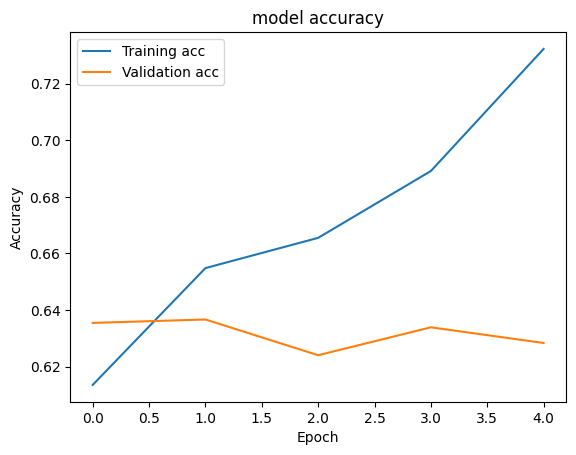

In [46]:
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'],label='Validation acc')
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

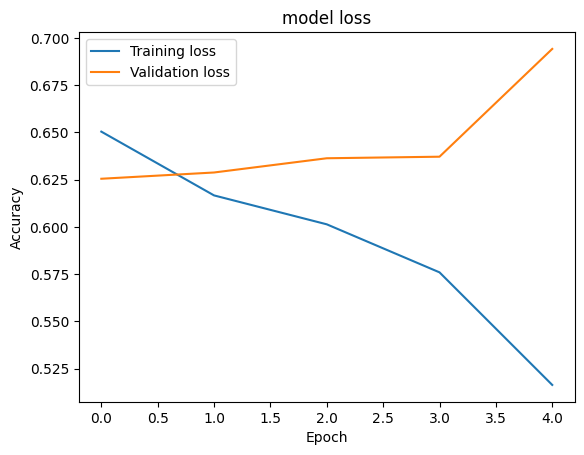

In [47]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.title('model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [84]:
# Make predictions on the test data
lstmPredictions_prob = lstmModel.predict(X_test)
lstmPredictions = np.argmax(lstmPredictions_prob, axis=1)
# lstmPredictions = lstmPredictions_prob

181/181 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step


In [59]:
# lstm_true_labels = np.argmax(y_test, axis = 0)

In [85]:
lstmPredictions[5]

1

In [87]:
y_test[5]

1

In [88]:
#Generate the classification report
lstm_report = classification_report(y_test, lstmPredictions)
print(lstm_report)

              precision    recall  f1-score   support

           0       0.64      0.69      0.66      2975
           1       0.64      0.58      0.61      2805

    accuracy                           0.64      5780
   macro avg       0.64      0.64      0.63      5780
weighted avg       0.64      0.64      0.64      5780



In [89]:
# Calculate the confusion matrix
lstm_conf_matrix = confusion_matrix(y_test, lstmPredictions)

In [90]:
class_names = ['Positive', 'Negative']

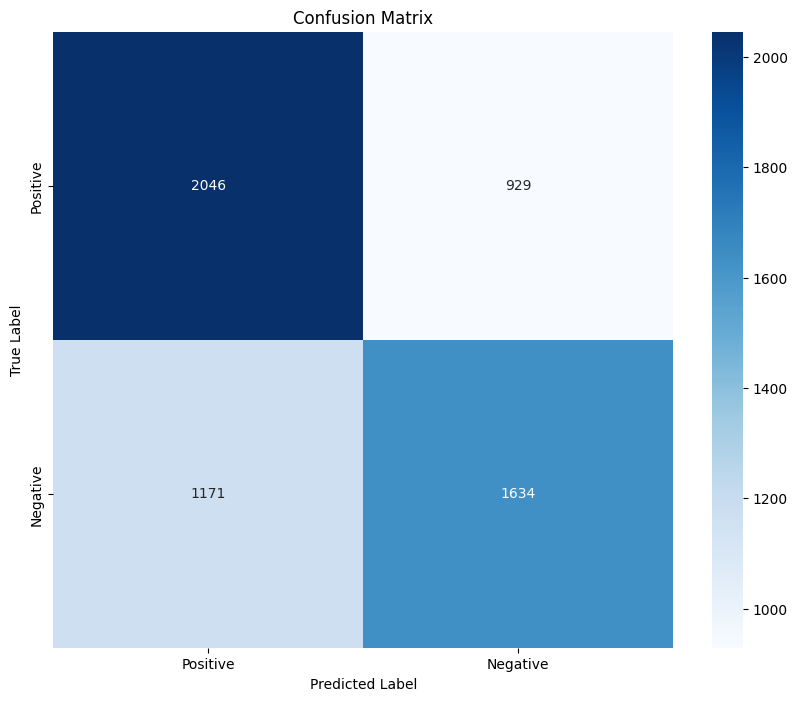

In [91]:
# Set up the matplotlib figure
plt.figure(figsize = (10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(lstm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## CNN

In [93]:
cnnModel = Sequential()
cnnModel.add(Embedding(voc_size, embedding_vector_features, input_length = input_length))
cnnModel.add(Conv1D(128, 5, activation = 'relu'))
cnnModel.add(GlobalMaxPooling1D())
cnnModel.add(Dense(32, activation = 'relu'))
cnnModel.add(Dropout(0.5))
cnnModel.add(Dense(num_classes, activation = 'softmax'))

In [94]:
cnnModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy']
                )

In [95]:
cnnModel.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Save best points when the model is improving
cnnModel_best_points_path = '/kaggle/working/cnnModel_Best_points.keras'
MCP = ModelCheckpoint(cnnModel_best_points_path, verbose = 1, save_best_only = True, monitor = 'val_accuracy', mode = 'max')

# Early stop when the model stops improving
ES = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, verbose = 0, restore_best_weights = True, patience = 3, mode = 'max')

# Reduce the learning rate when the model stops improving, val_loss specifically
RLP = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.2, min_lr = 0.0001)

In [97]:
cnnHistory = cnnModel.fit(X_train,
                          y_train_encoded,
                          epochs = 20,
                          validation_data = (X_test, y_test_encoded),
                          batch_size = 64,
                          callbacks = [MCP, ES, RLP]
                         )

Epoch 1/20
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5853 - loss: 0.6656
Epoch 1: val_accuracy improved from -inf to 0.63685, saving model to /kaggle/working/cnnModel_Best_points.keras
362/362 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.5854 - loss: 0.6656 - val_accuracy: 0.6369 - val_loss: 0.6258 - learning_rate: 0.0010
Epoch 2/20
361/362 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6750 - loss: 0.5985
Epoch 2: val_accuracy improved from 0.63685 to 0.64221, saving model to /kaggle/working/cnnModel_Best_points.keras
362/362 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.6749 - loss: 0.5985 - val_accuracy: 0.6422 - val_loss: 0.6210 - learning_rate: 0.0010
Epoch 3/20
361/362 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7265 - loss: 0.5309
Epoch 3: val_accuracy did not improve from 0.64221
362/362 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.7264 - loss: 0.5310 - val_accuracy: 0.6367 - val_loss: 0.6450 - learning_rate: 0.0010
Epoch 4/20
361/362 ━━━━━━━━━━━━━

In [98]:
score = cnnModel.evaluate(X_test, y_test_encoded, verbose = 2)
print("Test score:", score[0])
print('Test accuracy:', score[1])

181/181 - 2s - 9ms/step - accuracy: 0.6422 - loss: 0.6210
Test score: 0.6209732890129089
Test accuracy: 0.6422145366668701


In [99]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

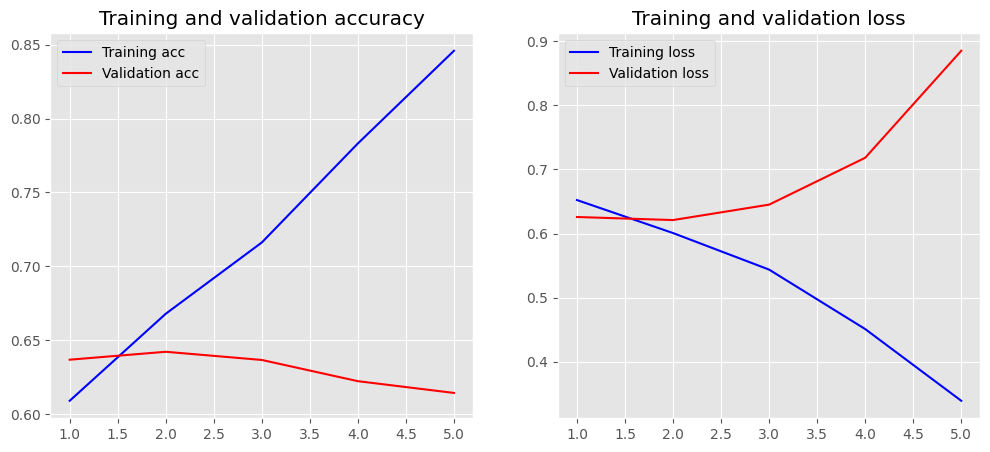

In [100]:
plot_history(cnnHistory)

In [101]:
cnnPredictions_prob = cnnModel.predict(X_test)
cnnPredictions = np.argmax(cnnPredictions_prob, axis=1)

181/181 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [118]:
cnnPredictions[5]

1

In [ ]:
# cnn_true_labels = np.argmax(y_test, axis=1)

In [1]:
y_test[5]

NameError: name 'y_test' is not defined

In [106]:
cnn_report = classification_report(y_test, cnnPredictions)
print(cnn_report)

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      2975
           1       0.67      0.52      0.58      2805

    accuracy                           0.64      5780
   macro avg       0.65      0.64      0.64      5780
weighted avg       0.65      0.64      0.64      5780



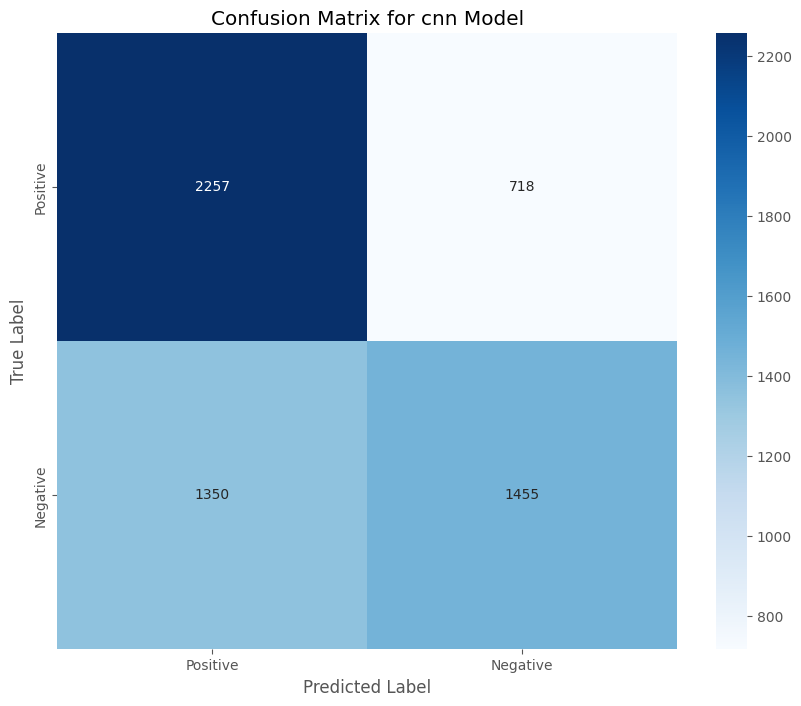

In [107]:
# confusion matrix
cnn_conf_matrix = confusion_matrix(y_test, cnnPredictions)
class_names = ['Positive', 'Negative']

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for cnn Model')

# Show the plot
plt.show()